In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Google minería de datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics

#Graficar para hacer dashboards
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Mounted at /content/drive


# **MODELO KNN**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


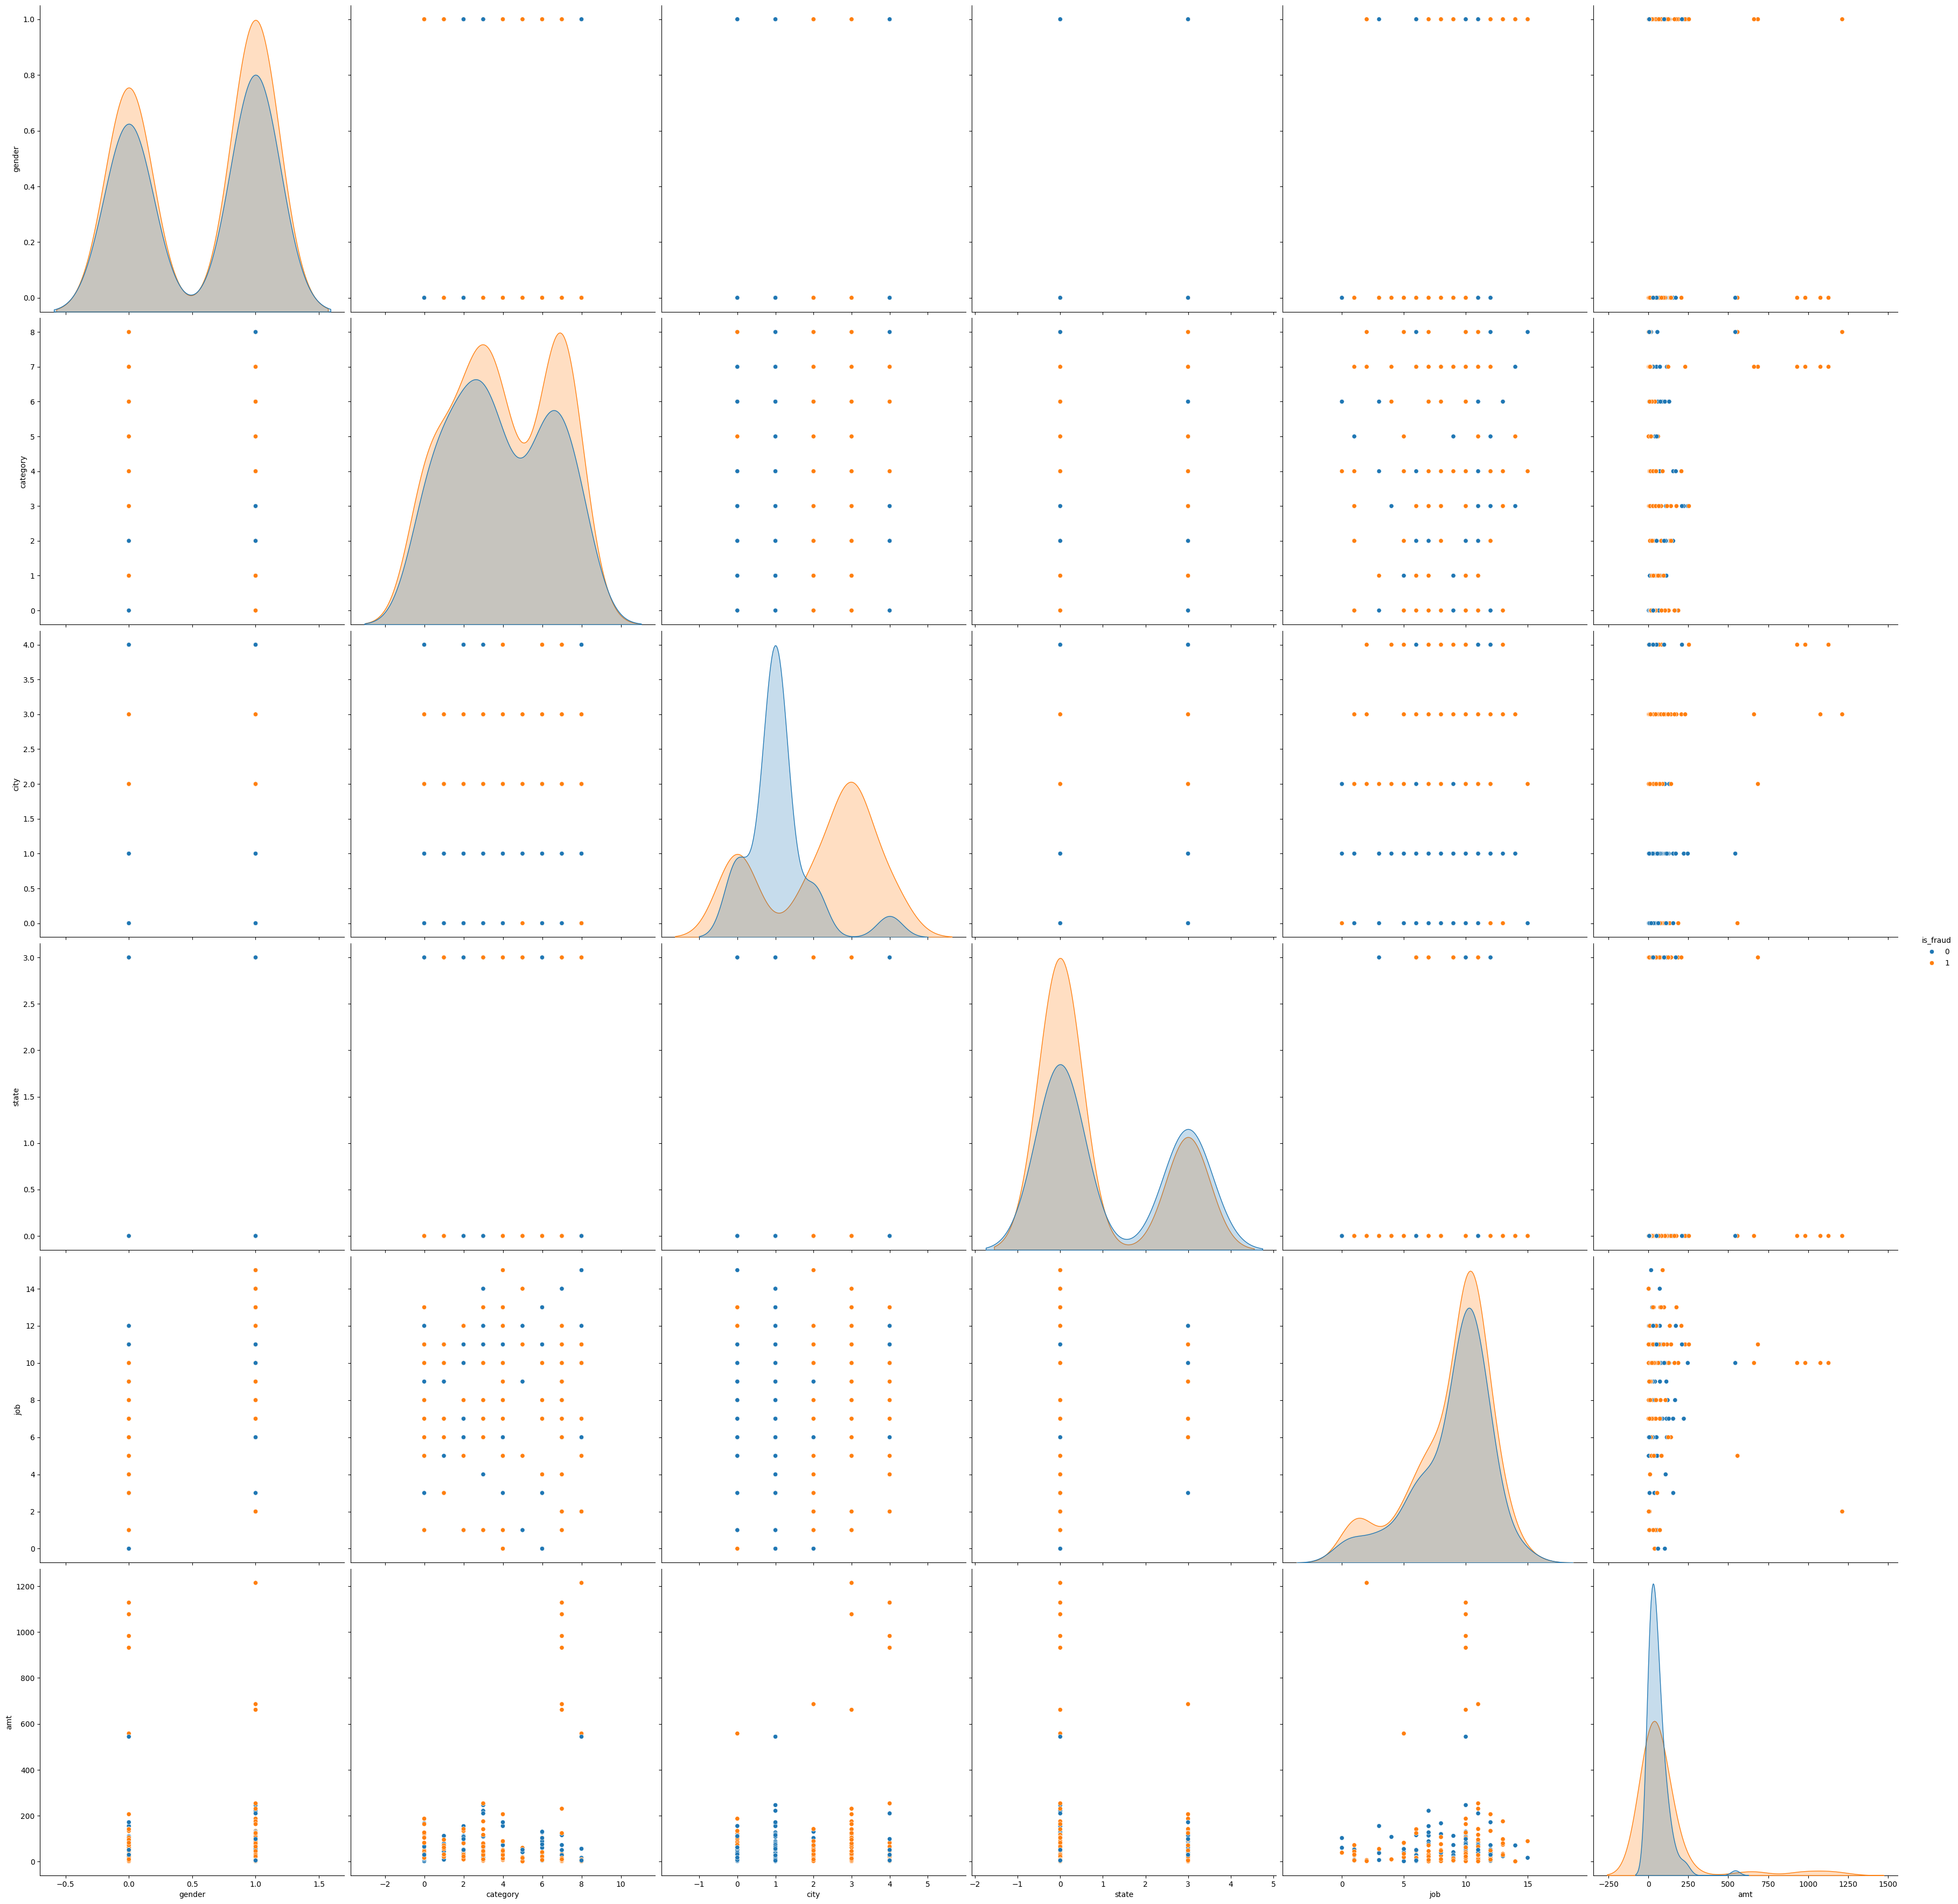

In [ ]:
nxl='/content/drive/MyDrive/Analítica 2024/fraude_1.xlsx'
XDB= pd.read_excel(nxl, sheet_name=1)
XDB=XDB.dropna()

#Crear el dashboard
sns.pairplot(XDB,hue='is_fraud',size=6,vars=['gender','category','city','state','job','amt'])

In [ ]:
#Datos de entrada - Datos de salida
XD=np.array(XDB[['gender','category','city','state','job','amt']])
yd=np.array(XDB[['is_fraud']])

mknn=KNeighborsClassifier()
mknn.fit(XD,yd)
ydp=mknn.predict(XD)

print('La precisión en el pronóstico es:', metrics.accuracy_score(yd,ydp))

#Matriz de confusión
cm=confusion_matrix(yd,ydp)

VP=cm[0,0];FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]

print('El coeficiente de sensibilidad', VP/(VP+FP))
print('El coeficiente de especificidad', VN/(FN+VN))

La precisión en el pronóstico es: 0.7168141592920354
El coeficiente de sensibilidad 0.6724137931034483
El coeficiente de especificidad 0.7636363636363637


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


El solicitante de crédito pertenece al grupo [5]


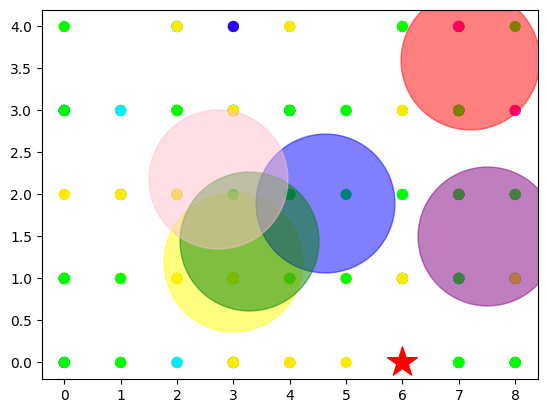

La conformación de los centroids es:
 [[ 5.00000000e-01  7.50000000e+00  1.50000000e+00  7.50000000e-01
   9.00000000e+00  6.12462500e+02]
 [ 5.45454545e-01  3.00000000e+00  1.19696970e+00  6.36363636e-01
   8.54545455e+00  5.77281818e+01]
 [ 5.76576577e-01  4.62162162e+00  1.90090090e+00  1.21621622e+00
   9.00900901e+00  1.38012613e+01]
 [ 5.17241379e-01  3.27586207e+00  1.44827586e+00  1.24137931e+00
   8.72413793e+00  1.17026897e+02]
 [ 8.18181818e-01  2.72727273e+00  2.18181818e+00  8.18181818e-01
   1.04545455e+01  2.03048182e+02]
 [ 2.00000000e-01  7.20000000e+00  3.60000000e+00 -1.11022302e-16
   8.40000000e+00  1.06700000e+03]]


In [ ]:
np.random.seed(42) #Este número se usa para que las bases de todos arranquen desde el mismo dato

#Creame 5 grupos de datos - Cluster
k=6

mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)

labels=mkm.labels_
centroids=mkm.cluster_centers_

XDi=np.array([(1,6,0,0,10,1000)])
ydk=mkm.predict(XDi)
print('El solicitante de crédito pertenece al grupo',ydk)

plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='gist_rainbow')
plt.scatter(XDi[:,1],XDi[:,2],marker='*',s=500,facecolors='red')


plt.scatter(centroids[0,1], centroids[0,2], marker="o",alpha=0.5, s=10000, facecolors='purple')#centroide 0
plt.scatter(centroids[1,1], centroids[1,2], marker="o",alpha=0.5, s=10000, facecolors='yellow')#centroide 1
plt.scatter(centroids[2,1], centroids[2,2], marker="o",alpha=0.5, s=10000, facecolors='blue')#centroide 2 (este es el solicitante)
plt.scatter(centroids[3,1], centroids[3,2], marker="o",alpha=0.5, s=10000, facecolors='green')#centroide 3
plt.scatter(centroids[4,1], centroids[4,2], marker="o",alpha=0.5, s=10000, facecolors='pink')#centroide 4
plt.scatter(centroids[5,1], centroids[5,2], marker="o",alpha=0.5, s=10000, facecolors='red')
plt.show()

print('La conformación de los centroids es:\n',centroids)
dfm=pd.DataFrame(centroids)

dfm.columns=['gender','category','city','state','job','amt']

#Para ver luego las categorías del grupo debo darle enter solo a centroids

In [ ]:
counts_1=np.bincount(labels)#cuantos datos conforman cada grupo-datos (se cuentan desde 0)

XDB['cluster']=labels


counts_2=XDB.groupby('cluster').agg({"is_fraud":lambda x: (x==0).sum()})
counts_3=XDB.groupby('cluster').agg({"is_fraud":lambda x: (x==1).sum()})


df=pd.DataFrame(np.column_stack((counts_2,counts_3)))

,0,1
0,1,3
1,38,28
2,45,66
3,15,14
4,5,6
5,0,5


# **MADALINE**

In [ ]:
XDB=pd.read_excel('/content/drive/MyDrive/Analítica 2024/fraude_1.xlsx',sheet_name=1)
XDB=XDB[['gender','category','city','state','job','amt','is_fraud']]
XDB=XDB.dropna()

#Se cargaron los datos en bruto
XD=np.array(XDB[['gender','category','city','state','job','is_fraud']])
yd=np.array(XDB[['amt']])

#Se procede a normalizar los datos (esto es para todas las variables tengan la misma magnitud)
XDn=XD/np.max(XD,axis=0)
ydn=(1/(np.max(yd)-np.min(yd)))*(yd-np.min(yd))

In [ ]:
NE=6 #Definimos #de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(10,activation='linear',use_bias=False,input_dim=NE))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse')
history=model.fit(XDn,ydn,epochs=1000,batch_size=26)
ys=model.predict(XDn)


Epoch 1/1000
9/9 [==============================] - 1s 4ms/step - loss: 0.6547
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5465
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4714
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4150
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3704
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3298
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2944
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2635
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2371
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2134
Epoch 11/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1917
Epoch 12/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1724
Epoch 13/1000
9/9 [==============================

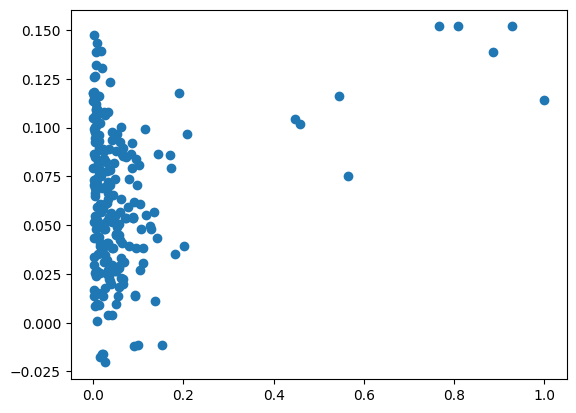

La correlación es:           0         1
0  1.000000  0.263988
1  0.263988  1.000000
Los efectos independientes son:
 [[-0.02253351]
 [ 0.06812927]
 [ 0.05138916]
 [-0.0299876 ]
 [ 0.02068132]
 [ 0.01721999]]
La discrepancia de las medias es: 4.681999545830838
La discrepancia entre dispersiones es: 73.82008618334847


<Figure size 640x480 with 0 Axes>

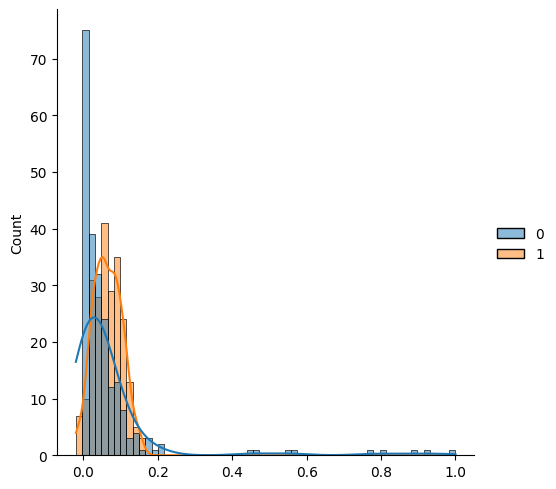

In [ ]:
#Gráfico de dispersión
plt.figure() #la gráfica es la correlación de yd y ys
plt.scatter(ydn,ys)
plt.show()

#Matriz de correlación
df=pd.DataFrame(np.column_stack((ydn,ys)))
print('La correlación es:',df.corr())

#Efectos independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights() [0]  #2da capa de conexiones
np.dot(W2,C2)
print('Los efectos independientes son:\n',np.dot(W2,C2))

#Discrepacia de las medias
dscm=(np.mean(ydn)-np.mean(ys))/np.mean(ydn)
print('La discrepancia de las medias es:',dscm*100)

#Dicrepancia entre desviaciones
dscv=(np.std(ydn)-np.std(ys))/np.std(ydn)
print("La discrepancia entre dispersiones es:",dscv*100)


#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys.flatten()),kde=True)
plt.show()

**ANÁLISIS**

Para analizar la base de datos 'Data Fraud', la cual contiene información sobre casos de fraude en tarjetas de crédito en diferentes comercios en Estados Unidos, decidimos(en el Estado de Florida) seleccionamos las siguientes variables: 'gender','category','city','state','job','amt'y 'is_fraud'.

***Modelo KNN MEANS***
Inicialmente, se desarrolló un modelo KNN de clasificación, en el cual utilizamos como variable de salida 'is_fraud'; donde 0 es que no hubo fraude y 1 que sí lo hubo. Inicialmente con este modelo, quisimos analizar la correlación entre las variables para identificar si había una relación importante entre ellas, sin embargo, las gráficas nos muestran que ninguna se correlaciona significativamente entre sí, aunque si podemos ver que la variable que mejor puede diferenciar los datos es la de ciudad.

Luego procedimos a analizar los resultados de la evaluación del modelo, los cuales revelan que la precisión del modelo es 71.68%, lo cual es refleja un buen desempeño del modelo, pero no muy significativo. Así mismo, la sensibilidad es del 67.24%, lo que indica que el modelo logra identificar un porcentaje significativo de transacciones fraudulentas, pero que aún hay un margen de error por mejorar en la detección de fraude.

Por otro lado, la especificidad del 76.36% tiene una buena capacidad para distinguir transacciones legítimas, aunque igualmente existe el riesgo de clasificar erróneamente algunas como fraudulentas.

Finalmente, se analizaron los datos de un usuario aleatorio para conocer su clasificación dentro de un grupo, con la información: 1,6,0,0,10,1000; lo que significa que es un usuario femenino, la categoría de la compra es 'Personal care', ciudad West Palm Beach, estado de Florida, que el trabajo del usuario es health physicist y el valor de la transacción fue 1000 USD.

A lo que se encontró que pertenecería a un grupo 5, el cual, según los datos analizados demuestra que una persona con esas características socioeconómicas tiene una probabilidad del 100% de cometer fraude.


***MODELO NEURONAL MADALINE***

El segundo modelo utilizado, fue el modelo neuronal MADALINE, el cual nos sirve para realizar un pronóstico. Para este caso se tomó como variable (continua) de salida, la cual es 'amt'; monto de la transacción, y se tomó como valor de epoch 1000 y batch size de 26, teniendo en cuenta que es el 10% de los datos.



Teniendo en cuenta los resultados nos damos cuenta que hay una correlación positiva moderada (0.263978). Luego al observar los coeficientes de efectos independientes se puede observar que las variable categoría y ciudad, representan un impacto significativo en el modelo, ya que tienen mayor peso en él.

En cuanto a la discrepancia de las medias (que es de aproximadamente 4.6819) indica que hay diferencias notables entre las medias de los grupos en el conjunto de datos y que los datos están subestimados. Y la discrepancia entre dispersiones es de aproximadamente 73.82.

En la última gráfica se puede evidenciar que la distribución es desigual, donde el 1 que es representado por el color naranja tiene un menor recuento que el 0 que es representado por azul, el cual alcanza más de 60.